In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# AB testing
# -----------------------------------------------------------------------
from scipy.stats import ttest_ind
from scipy.stats import levene

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# cargamos todos los conjuntos de datos: 

df_activity = pd.read_csv('Customer_Flight_Activity.csv', index_col = 0)
df_history = pd.read_csv('Customer_Loyalty_History.csv', index_col = 0)

In [3]:
def explorar_datos(dataframe, nombre):
    # Muestra las primeras filas del conjunto de datos
    print(f"Primeras filas de {nombre}:")
    print(dataframe.head())

    # Información sobre la estructura de los datos y la presencia de valores nulos
    print(f"\nInformación de {nombre}:")
    print(dataframe.info())

    # Estadísticas básicas de las columnas involucradas
    print(f"\nEstadísticas de {nombre}:")
    print(dataframe.describe())

# Llamadas a la función para tus conjuntos de datos
explorar_datos(df_activity, "df activity")
explorar_datos(df_history, "df history")


Primeras filas de df activity:
                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
100018          2017      1               3                        0   
100102          2017      1              10                        4   
100140          2017      1               6                        0   
100214          2017      1               0                        0   
100272          2017      1               0                        0   

                Total Flights  Distance  Points Accumulated  Points Redeemed  \
Loyalty Number                                                                 
100018                      3      1521               152.0                0   
100102                     14      2030               203.0                0   
100140                      6      1200               120.0                0   
100214                      0         0                 0.0     

In [74]:
df_activity.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [75]:
#Saco el loyalty number del indice para ver bien los duplicados
df_activity.reset_index(inplace=True)

In [76]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [77]:
df_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [78]:
df_activity.duplicated().sum() #antes eran 1000, por eso el drop de la siguiente linea

1864

In [85]:
# Encuentra las filas duplicadas
duplicados = df_activity[df_activity.duplicated(keep=False)]

# Ordena los duplicados y muestra el resultado
duplicados_ordenados = duplicados.sort_values(by=list(df_activity.columns))
duplicados_ordenados.head(10)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
101447,101902,2017,7,0,0,0,0,0.0,0,0
101448,101902,2017,7,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
185953,101902,2017,12,0,0,0,0,0.0,0,0


In [5]:
df_activity = df_activity.drop_duplicates()

In [10]:
df_history.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [79]:
df_history.reset_index(inplace=True)

In [80]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [81]:
df_history.duplicated().sum()

0

In [14]:
df_history.isnull().sum()/df_history.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [15]:
df_history['Salary'].describe()

count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

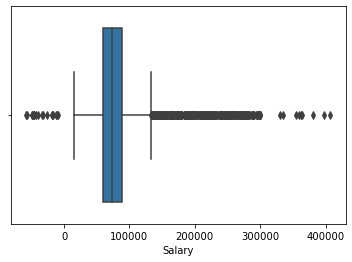

In [16]:
sns.boxplot(x='Salary', data= df_history);

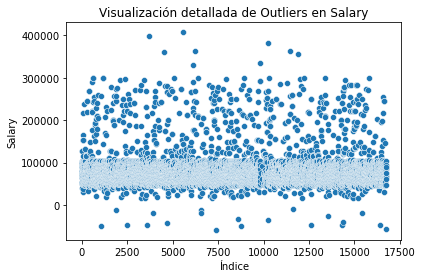

In [17]:
sns.scatterplot(x=df_history.index, y='Salary', data=df_history)
plt.xlabel('Índice')
plt.ylabel('Salary')
plt.title('Visualización detallada de Outliers en Salary')
plt.show()

In [7]:
# Primero paso los valores negativos a nulos
df_history['Salary'] = df_history['Salary'].apply(lambda x: None if x < 0 else x)

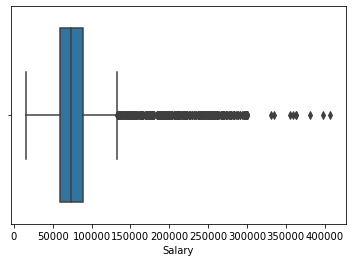

In [19]:
sns.boxplot(x='Salary', data= df_history);

In [20]:
df_history['Salary'].describe()

count     12479.000000
mean      79429.572642
std       34727.560404
min       15609.000000
25%       59265.000000
50%       73510.000000
75%       88600.500000
max      407228.000000
Name: Salary, dtype: float64

In [21]:
df_history.isnull().sum()/df_history.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.440640
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [22]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [23]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [8]:
# Antes de hacer una imputación de nulos con un modelo predictivo, uno ambos csv por si así tengo mas informacion relevante

df_final = pd.merge(df_activity, df_history, how='left', on='Loyalty Number')

In [71]:
df_final.duplicated().sum()

0

In [9]:
df_final.isnull().sum()/df_final.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.445809
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Mon

(0.0, 500000.0)

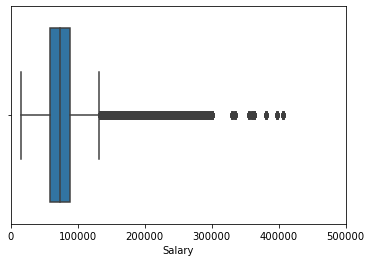

In [26]:
sns.boxplot(x='Salary', data= df_final);
plt.xlim(0,500000)

In [10]:
df_final_copy = df_final.copy()

In [11]:
# Cambiar tipo de dato
# 'Points Accumulated' a int64
df_final_copy['Points Accumulated'] = df_final_copy['Points Accumulated'].astype(int)

# 'Dollar Cost Points Redeemed' a float64
df_final_copy['Dollar Cost Points Redeemed'] = df_final_copy['Dollar Cost Points Redeemed'].astype(float)

# De float a int
df_final_copy['Cancellation Year'] = df_final_copy['Cancellation Year'].astype('Int64')
df_final_copy['Cancellation Month'] = df_final_copy['Cancellation Month'].astype('Int64')

# Verificar el cambio de tipo de dato
print(df_final_copy.dtypes)


Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int64
Points Redeemed                  int64
Dollar Cost Points Redeemed    float64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                Int64
Cancellation Month               Int64
dtype: object


In [12]:
df_final_copy['Education'].value_counts()

Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: Education, dtype: int64

In [13]:
df_final_copy.shape

(403760, 25)

In [29]:
#Subset filtrando por education porque hay una relacion entre los nulos y college y porque aplicarlo al df total lleva mucho tiempo

In [17]:
#KNN
#CLV y Salary (dentro de las columnas que tenemos, el CLV - customer life value, es un indicador que puede estar relacionado con el salario)
# valor monetario que tiene ese cliente.
#instanciamos las clases
imputer = KNNImputer(n_neighbors=5)
#ajustamos y tranformamos los datos
df_copy_knn = imputer.fit_transform(df_final_copy[['Salary', 'CLV']])
#Creamos una columna sobre nuestra copia con estos datos.
df_final_copy[['Salary_knn', 'CLV_knn']]=df_copy_knn


In [14]:
#Iterative
#CLV y Salary (dentro de las columnas que tenemos, el CLV - customer life value, es un indicador que puede estar relacionado con el salario)
# valor monetario que tiene ese cliente.
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state=42)
# ajustamos y tranformamos los datos
df_copy_iterative = imputer_iterative.fit_transform(df_final_copy[['Salary','CLV']])
df_copy_iterative


array([[92552.        ,  7919.2       ],
       [79998.49547536,  2887.74      ],
       [80003.77597986,  2838.07      ],
       ...,
       [47670.        , 20266.5       ],
       [80025.73041884,  2631.56      ],
       [46594.        ,  8257.01      ]])

In [15]:
#Columna sobre la copia con estos datos.
df_final_copy[['Salary_iterative', 'CLV_iterative']]=df_copy_iterative

In [18]:
df_final_copy.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Salary_iterative', 'CLV_iterative', 'Salary_knn',
       'CLV_knn'],
      dtype='object')

In [19]:
df_final_copy[['Salary', 'Salary_knn', 'Salary_iterative', 'CLV', 'CLV_knn',
       'CLV_iterative']].describe()


,Salary,Salary_knn,Salary_iterative,CLV,CLV_knn,CLV_iterative
count,301020.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000
mean,79441.628829,79709.865461,79455.973354,7990.864857,7990.864857,7990.864857
std,34704.340158,35322.906843,29967.457442,6863.317160,6863.317160,6863.317160
min,15609.000000,15609.000000,15609.000000,1898.010000,1898.010000,1898.010000
25%,59278.000000,59220.000000,64001.000000,3981.780000,3981.780000,3981.780000
50%,73523.000000,73530.000000,79269.170309,5776.340000,5776.340000,5776.340000
75%,88626.000000,88612.000000,82940.000000,8937.120000,8937.120000,8937.120000
max,407228.000000,407228.000000,407228.000000,83325.380000,83325.380000,83325.380000


In [20]:
#Elimino las columnas que no me interesan y renombro con la que me quedo
lista_copy_nulos = ['Salary', 'Salary_iterative', 'CLV', 'CLV_knn',
       'CLV_iterative']

def eliminar_columna(df,eliminar):
    return df.drop(eliminar, axis=1,inplace=True)

eliminar_columna(df_final_copy, lista_copy_nulos)

In [21]:
df_final_copy.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month',
       'Salary_knn'],
      dtype='object')

In [22]:
dicc_col_copy = {'Salary_knn': 'Salary'}
df_final_copy = df_final_copy.rename(columns= dicc_col_copy)


In [45]:
df_final_copy.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
0,100018,2017,1,3,0,3,1521,152,0,0.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard,2016,8,<NA>,<NA>,92552.0
1,100102,2017,1,10,4,14,2030,203,0,0.0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard,2013,3,<NA>,<NA>,77288.0
2,100140,2017,1,6,0,6,1200,120,0,0.0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard,2016,7,<NA>,<NA>,53304.0
3,100214,2017,1,0,0,0,0,0,0,0.0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard,2015,8,<NA>,<NA>,63253.0
4,100272,2017,1,0,0,0,0,0,0,0.0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard,2014,1,<NA>,<NA>,91163.0


In [24]:
df_final_copy.isnull().sum()/df_final.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Marital Status                  0.000000
Loyalty Card                    0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Salary                          0.000000
dtype: float64

In [25]:
df_final_copy[df_final_copy['Education'] == 'College'][['Education', 'Salary']].sample(7)


,Education,Salary
192344,College,74029.0
100732,College,52384.0
141913,College,66499.0
35752,College,47291.0
266009,College,45654.0
383818,College,98675.0
228202,College,63029.0


In [47]:
# Me saco un csv con los datos ya limpios por si se me bloquea el codigo
df_final_copy.to_csv('df_limpio.csv', index=True)

In [48]:
df_limpio = pd.read_csv("df_limpio.csv", index_col= 0)

In [49]:
df_limpio.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
0,100018,2017,1,3,0,3,1521,152,0,0.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard,2016,8,NaN,NaN,92552.0
1,100102,2017,1,10,4,14,2030,203,0,0.0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard,2013,3,NaN,NaN,77288.0
2,100140,2017,1,6,0,6,1200,120,0,0.0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard,2016,7,NaN,NaN,53304.0
3,100214,2017,1,0,0,0,0,0,0,0.0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard,2015,8,NaN,NaN,63253.0
4,100272,2017,1,0,0,0,0,0,0,0.0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard,2014,1,NaN,NaN,91163.0


### VISUALIZACIONES

In [50]:
df_limpio.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month',
       'Salary'],
      dtype='object')

Text(0, 0.5, 'Cantidad de vuelos reservados')

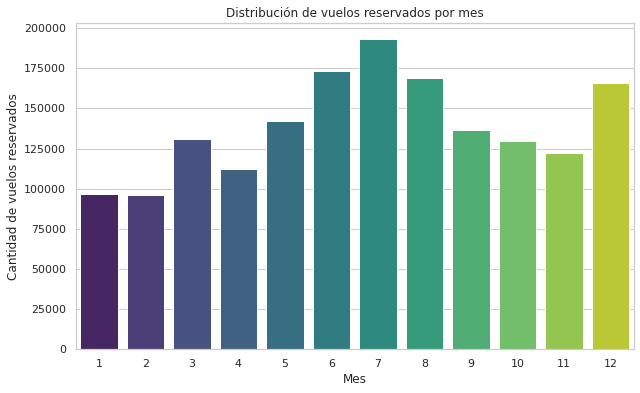

In [51]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
#Utilizo un gráfico de barras y agrupo por meses para ver el numero de vuelos por mes siendo los meses de verano y navidad en los
# que más reservas se hacen. tiene sentido, son meses de vacaciones.

# Agrupar por mes y contar la cantidad de vuelos reservados
flights_by_month = df_limpio.groupby('Month')['Flights Booked'].sum().reset_index() #para tener la agrupacion month como columna y poder ponerla en el eje x

# Configurar el estilo de seaborn
sns.set(style="whitegrid") #fondo blanco

# Crear el gráfico de barras
plt.figure(figsize=(10, 6)) #tamaño
sns.barplot(x='Month', y='Flights Booked', data=flights_by_month, palette='viridis') #indico eje x y eje y el df de donde chupa dato y el color
plt.title('Distribución de vuelos reservados por mes') #titulo de la grafica
plt.xlabel('Mes') #titulo eje x
plt.ylabel('Cantidad de vuelos reservados')#titulo eje y


Text(0, 0.5, 'Puntos acumulados')

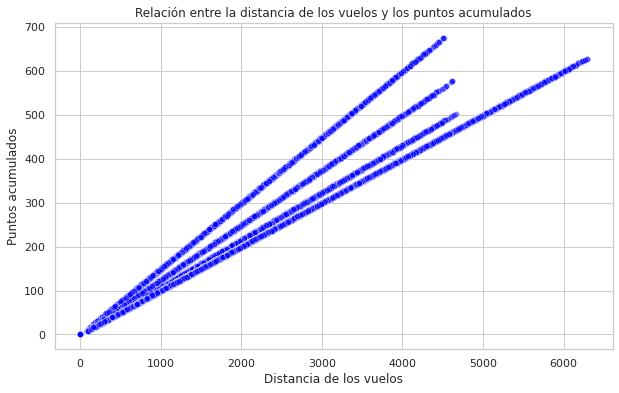

In [52]:
# 2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
#sí existe una correlación entre la distancia de los vuelos y los puntos acumulados y podemos verlo en el dibujo que forman los
#puntos en el gráfico. La lectura sería que, cuanto mayor es la distancia de los vuelos, mayor es el número de puntos que acumulan
# los clientes, es decir, es una correlación positiva, ambas variables crecen
sns.set(style="whitegrid")

#gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_limpio, alpha=0.5, color='blue') #transparencia para que se vean los puntos que se superponen
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Ontario'),
  Text(1, 0, 'British Columbia'),
  Text(2, 0, 'Quebec'),
  Text(3, 0, 'Alberta'),
  Text(4, 0, 'Manitoba'),
  Text(5, 0, 'New Brunswick'),
  Text(6, 0, 'Nova Scotia'),
  Text(7, 0, 'Saskatchewan'),
  Text(8, 0, 'Newfoundland'),
  Text(9, 0, 'Yukon'),
  Text(10, 0, 'Prince Edward Island')])

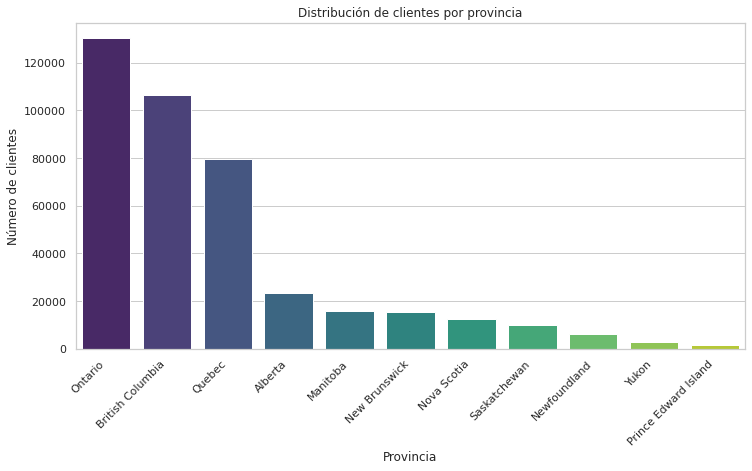

In [53]:
# ¿Cuál es la distribución de los clientes por provincia o estado?
# Ontario, British Columbia y Quebec las trespirncipales provincias en cuanto a numero de clientes. la siguiente es Alberta pero ya
# existe mucha diferencia con respescto a las 3 primeras por tanto, podemos afirmar que la mayor concentración de clientes está en 
# esas 3.

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', data=df_limpio, palette='viridis', order=df_limpio['Province'].value_counts().index)
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad y en horizontal


Text(0.5, 1.0, 'Comparación del Salario Promedio por Nivel Educativo')

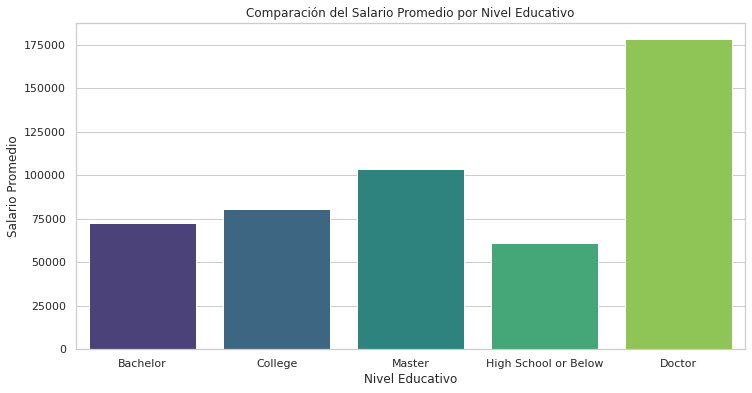

In [54]:
# ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
#Entendiendo que la jerarquía sea:
# Doctor
# Master
# Bachelor
# College
# High School or Below

# Sí existe una correlación positiva entre el nivel educativo y el salario.
# Cuanto más formado estás, más cobras. Existe una gran diferencia entre ser Doctor y el resto de niveles, pero la escala jerarquica
# sí influye en el rango salarial. Podríamos utilizar este dato para clusterizar a nuestros clientes y enfoncar cada producto (como
# la tarjeta de fidelización a cada cluster)

sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Salary', data=df_limpio, palette='viridis', ci=None)

# Añadir etiquetas y título
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación del Salario Promedio por Nivel Educativo')

Text(0, 0.5, 'Número de Clientes')

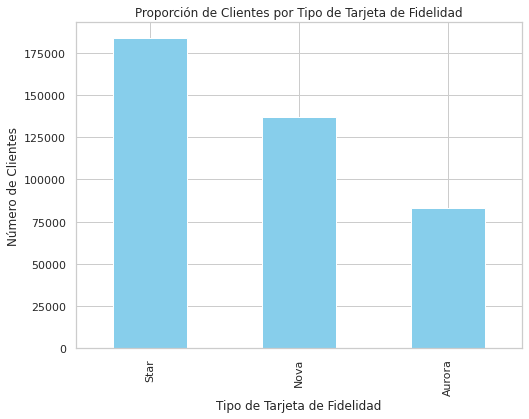

In [55]:
# ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
# He utilizado tanto un grafico de barras como un gráfico de reparto para ver la distribución. Casi la mitad de los clientes
# utilizan la tarjeta Star, por lo que podríamos decir que es el producto estrella. podríamos ver si existe una correlación
# con el tipo de tarjeta y el nivel de educación y el tipo de tarjeta y el salario, para entender si nuestros productos están 
# categorizados o más cercanos a un target concreto

# conteo tipo de tarjeta de fidelidad
loyalty_card_tipo = df_limpio['Loyalty Card'].value_counts()

#gráfico de barras
plt.figure(figsize=(8, 6))
loyalty_card_tipo.plot(kind='bar', color='skyblue')
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.xlabel('Tipo de Tarjeta de Fidelidad')
plt.ylabel('Número de Clientes')


Text(0.5, 1.0, 'Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

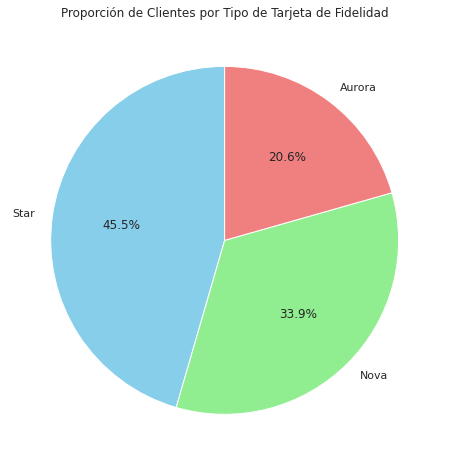

In [56]:
loyalty_card_counts = df_limpio['Loyalty Card'].value_counts()

#gráfico de reparto
plt.figure(figsize=(8, 8))
plt.pie(loyalty_card_counts, labels=loyalty_card_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')


In [57]:
df_limpio.duplicated().sum()

0

<Figure size 720x432 with 0 Axes>

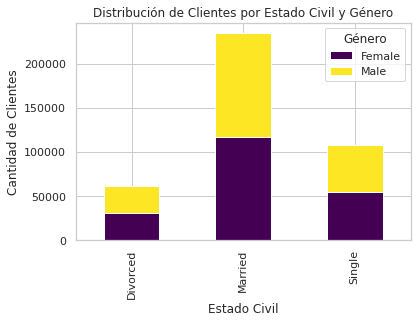

In [58]:
# ¿Cómo se distribuyen los clientes según su estado civil y género?
# lo que vemos en estos dos gráficos es que no hay diferencia entre hombres y mujeres en ninguno de los 3 estados civiles,
#y que nuestros clientes la mayoría están casados, después solteros y por último divorciados con un % mas bajo 
# Es decir, podríamos concluir que, de momento, los divorciados no son nuestra audiencia. o que somos una marca con muchas posibilidades
# antes un perfil de cliente casado.

# Agrupo por estado civil y género para poder ver en las barras apiladas
df_gender_marital = df_limpio.groupby(['Marital Status', 'Gender']).size().unstack()

plt.figure(figsize=(10, 6))
df_gender_marital.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Género', bbox_to_anchor=(1, 1))
plt.show()


(0.0, 140000.0)

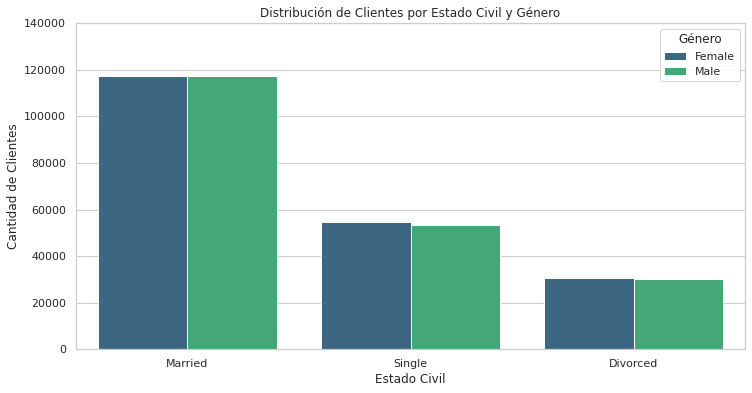

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital Status', hue='Gender', data=df_limpio, palette='viridis')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Género')
plt.ylim(0, 140000)


###  Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [60]:
# Filtro los datos para incluir solo las columnas que me interesan
df_filtrado = df_limpio[['Flights Booked', 'Education']]
df_filtrado.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [61]:
# Agrupo los datos por nivel educativo y calculo los estadísticos descriptivos de los vuelos reservados
agrupado_educacion = df_filtrado.groupby('Education')['Flights Booked'].describe()

agrupado_educacion


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [62]:
# Creo los grupos en función del nivel de educación
# Grupo control: 'Doctor', 'Master', 'Bachelor'
# Grupo test: 'College', 'High school or below'
df_filtrado['Education_Group'] = np.where(df_filtrado['Education'].isin(['Doctor', 'Master', 'Bachelor']), 'Control', 'Test')


/tmp/ipykernel_741/1922645422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Education_Group'] = np.where(df_filtrado['Education'].isin(['Doctor', 'Master', 'Bachelor']), 'Control', 'Test')


In [63]:
df_filtrado.head()

,Flights Booked,Education,Education_Group
0,3,Bachelor,Control
1,10,College,Test
2,6,College,Test
3,0,Bachelor,Control
4,0,Bachelor,Control


In [64]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Flights Booked   403760 non-null  int64 
 1   Education        403760 non-null  object
 2   Education_Group  403760 non-null  object
dtypes: int64(1), object(2)
memory usage: 28.4+ MB


In [65]:
df_filtrado[df_filtrado['Education_Group'] == 'Control'].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 282585 entries, 0 to 403759
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Flights Booked   282585 non-null  int64 
 1   Education        282585 non-null  object
 2   Education_Group  282585 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.6+ MB


In [66]:
df_filtrado.groupby('Education_Group').size()

Education_Group
Control    282585
Test       121175
dtype: int64

In [67]:
#Miro las varianzas antes de aplicar un t-student

#dos grupos: educación alta y educación baja
grupo_control = df_filtrado[df_filtrado['Education_Group'] == 'Control']['Flights Booked']
grupo_test = df_filtrado[df_filtrado['Education_Group'] == 'Test']['Flights Booked']

stat, p = levene(grupo_control, grupo_test)
print("Estadística de Levene:", stat)
print("Valor p:", p)


Estadística de Levene: 7.931372699306991
Valor p: 0.0048587279888045185


In [ ]:
# El valor p de la prueba de levene está por debajo de 0.05 por lo que las varianzas de los dos grupos son diferentes. 
# Aplico el método t-student porque quiero comparar las medias de los dos grupos independientes.

In [68]:
# t de Student
t_stat, p_value = ttest_ind(grupo_control, grupo_test, equal_var=False)  # Utilizar equal_var=False si las varianzas son diferentes

# Imprimir los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -2.9153100033342065
P-value: 0.0035536989927629375


In [ ]:
# el valor de t-statistic nos indica que que la media del grupo test (los de educación baja), es menor que la media del grupo 
#control (educación alta).
# el valor p-value es menor que 0.05 lo que indica que sí hay una "evidencia" para rechazar la hipotesis nula (no existe relación
# entre el nivel de educación y el numero de vuelos)
# Es decir, si podemos afirmar que existe una correlación entre el nivel de educación y el numero de vuelos reservados.
# y aunque hay que tener en cuenta que "la correlación no implica causalidad", si podemos afirmar que el grupo test (menos nivel de
# educación), reserva menos vuelos de media que el grupo control.

(0.0, 10.0)

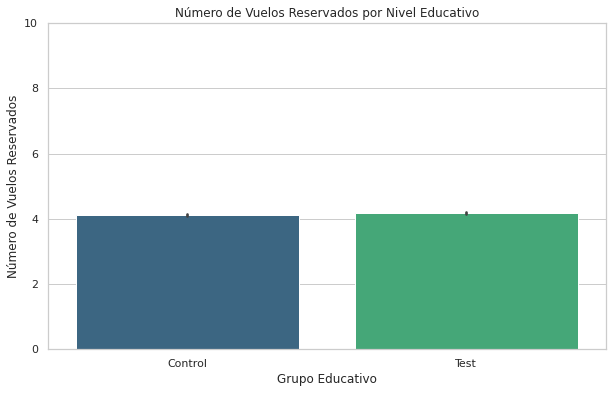

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education_Group', y='Flights Booked', data=df_filtrado, palette='viridis')
plt.title('Número de Vuelos Reservados por Nivel Educativo')
plt.xlabel('Grupo Educativo')
plt.ylabel('Número de Vuelos Reservados')
plt.ylim(0, 10) 


Text(0, 0.5, 'Número de Vuelos Reservados')

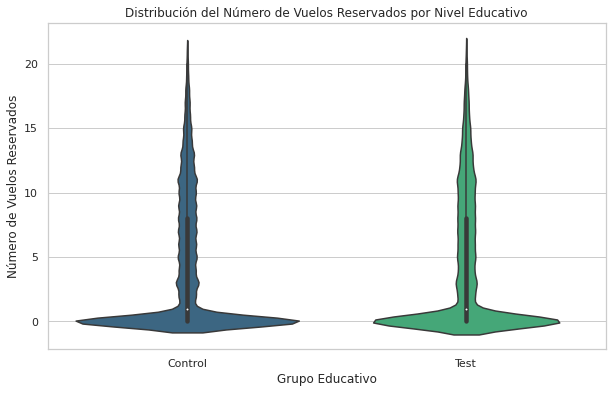

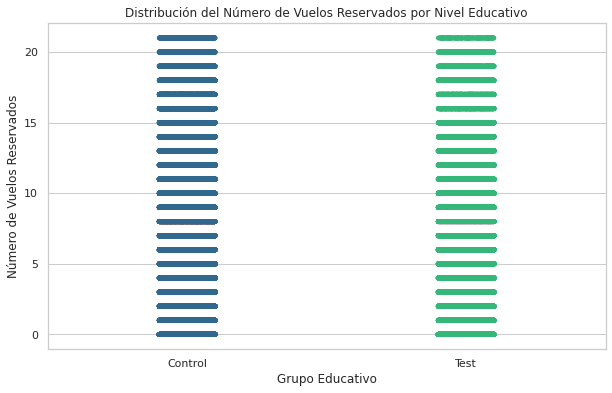

In [70]:
# Gráfico de Violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education_Group', y='Flights Booked', data=df_filtrado, palette='viridis')
plt.title('Distribución del Número de Vuelos Reservados por Nivel Educativo')
plt.xlabel('Grupo Educativo')
plt.ylabel('Número de Vuelos Reservados')

# Gráfico de Puntos
plt.figure(figsize=(10, 6))
sns.stripplot(x='Education_Group', y='Flights Booked', data=df_filtrado, palette='viridis', jitter=True)
plt.title('Distribución del Número de Vuelos Reservados por Nivel Educativo')
plt.xlabel('Grupo Educativo')
plt.ylabel('Número de Vuelos Reservados')
